In [14]:
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings("ignore")


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2)

In [17]:
data_set  = train_datagen.flow_from_directory(r"E:\\lung cancer data set\\training_data_set\\lung_image_sets",
                                                 target_size = (64,64),
                                                 class_mode = "categorical")

Found 15000 images belonging to 3 classes.


In [18]:
data_set.class_indices

{'lung_aca': 0, 'lung_n': 1, 'lung_scc': 2}

In [19]:
import tensorflow as tf

# Load the dataset from directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\\lung cancer data set\\training_data_set\\lung_image_sets",
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    subset='training',  # For training set
    seed=123
)

# Create the validation set (use the same path and subset='validation')
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\\lung cancer data set\\training_data_set\\lung_image_sets",
    image_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    subset='validation',  # For validation set
    seed=123
)

Found 15000 files belonging to 3 classes.
Using 12000 files for training.
Found 15000 files belonging to 3 classes.
Using 3000 files for validation.


In [20]:
test_datagen = ImageDataGenerator(rescale = 1/255,
                                 shear_range = 0.2,
                                  zoom_range = 0.2)
test_set  = test_datagen.flow_from_directory(r"E:\lung cancer data set\testing_data_set",
                                            target_size = (64,64),
                                            class_mode = "categorical")
                                  

Found 99 images belonging to 3 classes.


In [21]:
test_set.class_indices

{'lung aca': 0, 'lung n': 1, 'lung scc': 2}

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [23]:
model = models.Sequential([
    layers.InputLayer(input_shape=(64, 64, 3)),  # The shape of your input images
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for the classification
])

# training and testing the model

In [24]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=5
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.7101 - loss: 2.5960 - val_accuracy: 0.8910 - val_loss: 0.2670
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.8822 - loss: 0.2922 - val_accuracy: 0.9057 - val_loss: 0.2355
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9003 - loss: 0.2495 - val_accuracy: 0.9313 - val_loss: 0.1721
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9174 - loss: 0.2072 - val_accuracy: 0.8813 - val_loss: 0.2889
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9185 - loss: 0.1973 - val_accuracy: 0.9343 - val_loss: 0.1479


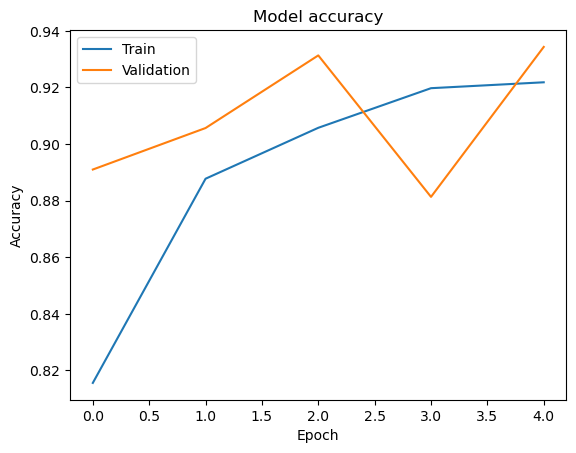

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [14]:
import numpy as np

# Prepare arrays to store true labels and predicted labels
y_true = []
y_pred = []

# Loop through the validation dataset to get true labels and predictions
for images, labels in dataset:
    y_true.extend(labels.numpy())  # Actual labels
    predictions = model.predict(images)  # Get the predicted probabilities
    y_pred.extend(np.argmax(predictions, axis=1))  # Get the predicted class (the class with the highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_true, y_pred, average='weighted')  # 'weighted' averages the metrics by class frequency
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true, y_pred, average='weighted')  # 'weighted' averages the metrics by class frequency
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' averages the metrics by class frequency
print(f"F1-Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (includes precision, recall, F1-score for each class)
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9306666666666666
Precision: 0.9362186998502784
Recall: 0.9306666666666666
F1-Score: 0.9303451691322981
Confusion Matrix:
[[3848   18  117]
 [   5 4008    0]
 [ 692    0 3312]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      3983
           1       1.00      1.00      1.00      4013
           2       0.97      0.83      0.89      4004

    accuracy                           0.93     12000
   macro avg       0.94      0.93      0.93     12000
weighted avg       0.94      0.93      0.93     12000



In [30]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_image = test_datagen.flow_from_directory(r"E:\lung cancer data set\single_predication",
                                            target_size = (64,64),
                                            class_mode = "categorical")

Found 2 images belonging to 2 classes.


In [33]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image (use double backslashes or raw string)
#test_image = Image.open(r"E:\\lung cancer data set\\single_predication")

# Image preprocessing
#test_image = test_image.resize((64, 64))  # Resize the image to 64x64
#test_image = np.array(test_image)         # Convert to numpy array
#test_image = np.expand_dims(test_image, axis=1)  # Add a batch dimension (1 image)

# Prediction
result = model.predict(test_image)  # Predict the class
predicted_class = np.argmax(result)  # Get the index of the highest probability

# Evaluation
if predicted_class == 0:
    print("lung_aca")  # Class 0: lung_aca
elif predicted_class == 1:
    print("lung_n")    # Class 1: lung_n
elif predicted_class == 2:
    print("lung_scc")  # Class 2: lung_scc
else:
    print("Unknown class")  # In case of any unexpected output



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
lung_scc


In [42]:
import cv2
import numpy as np
cv2.__version__

'4.10.0'

In [45]:
import os
if os.path.exists(r"C:\Users\lingi\cancer\colon_image_sets\colon_aca"):
    print("Path exists")
else:
    print("Path not found")

Path not found


In [54]:
img = cv2.imread("D:\lungaca14.jpg",1)
cv2.imshow("Cancer_predicted_image",img)
cv2.waitKey(20000)
cv2.destroyAllWindows()